# Analysis of the band interpolation.

In [1]:
from aiida import orm, load_profile
load_profile()
from aiida import orm
import matplotlib.pyplot as plt

In [2]:
gww90, b = orm.load_node(15102),4   # the YamboWannier90WorkChain node, and the occupied bands.

dft = gww90.outputs.band_structures.wannier90 #load_node(75931) ,76061
qp = gww90.outputs.band_structures.wannier90_qp #load_node(75946)   ,76076

In [3]:
# This block of code is just needed for the setting of the high-symmetry point labels.

l_x = []
l_names = []

for i in qp.creator.outputs.interpolated_bands.labels:
    l_x.append(i[0])
    if i[1] == 'GAMMA':
        l_names.append("$\Gamma$")
    else:
        l_names.append(i[1])

(0.0, 366.0)

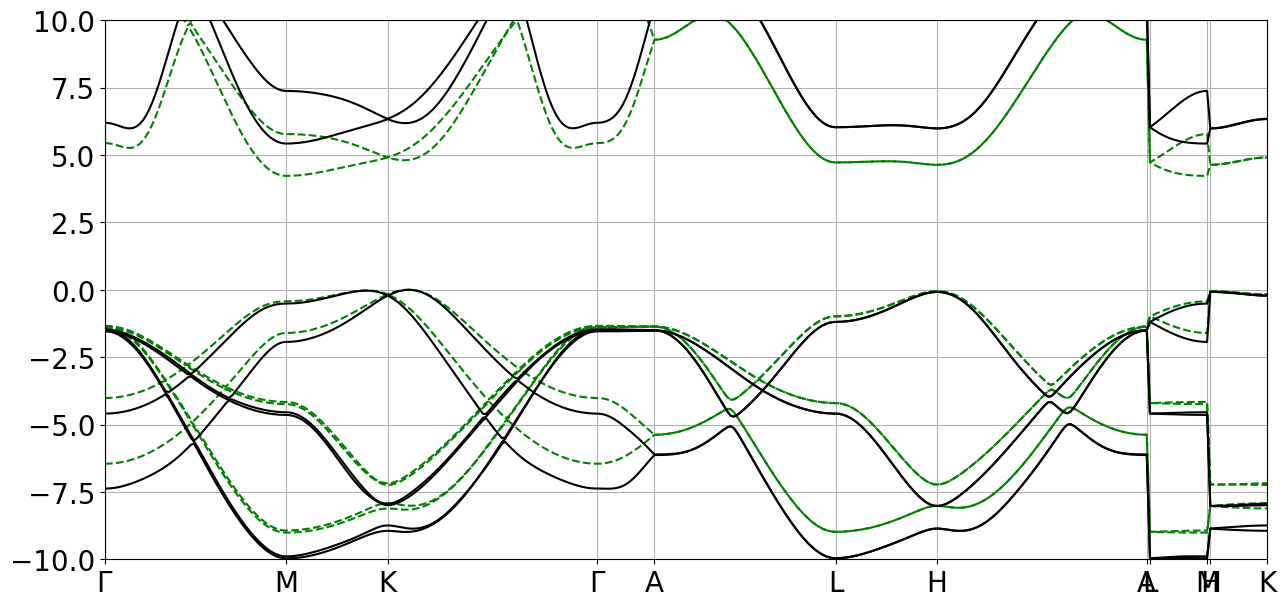

In [4]:
fig,ax=plt.subplots(figsize=[15,7])
plt.plot(dft.get_bands()-max(dft.get_bands()[:,b-1]),'--',color='green',label = 'DFT')
plt.plot(qp.get_bands()-max(qp.get_bands()[:,b-1]),color='black',ms=2,label='G0W0')
plt.ylim(-10,10)

plt.grid()
plt.xticks(l_x,l_names)
plt.tick_params(axis='both',labelsize=20)
plt.xlim(0,max(l_x))
#plt.ylim(-2,5)
#plt.legend()

#plt.savefig('plot_.pdf')

Text(0, 0.5, 'QP')

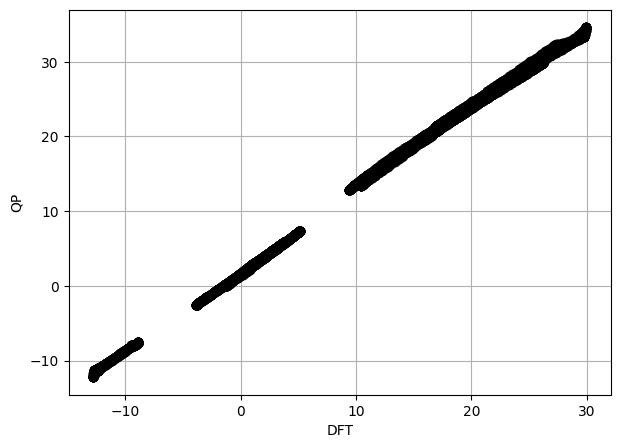

In [5]:
fig,ax=plt.subplots(figsize=[7,5])
plt.plot(dft.get_bands(),qp.get_bands(),'o',color='black')
#plt.ylim(-3,3)
#plt.xlim(-3,3)
plt.grid()
plt.xlabel('DFT')
plt.ylabel('QP')

In [31]:
s = load_node(17778)

In [34]:
s.get_site_kindnames()

['B', 'N', 'N', 'B']

In [36]:
s_ase = s.get_ase()

In [53]:
k_cell = s_ase.cell.reciprocal()

In [54]:
k_cell.bandpath().special_points

{'G': array([0., 0., 0.]),
 'A': array([ 0. ,  0. , -0.5]),
 'H': array([ 0.33333333, -0.33333333, -0.5       ]),
 'K': array([ 0.33333333, -0.33333333,  0.        ]),
 'L': array([ 0.5,  0. , -0.5]),
 'M': array([0.5, 0. , 0. ])}

In [ ]:
kp = {
    'path': [['G', 'M'],
        ['M', 'K'],
        ['K', 'G'],
        ['G', 'K1'],
        ['K1', 'M2'],
        ['M2', 'G'],
        ['G', 'K']],
    'point_coords': {
        'G': [0.0, 0.0, 0.0],
        'K': [0.333333, -0.666667, 0.0],
        'M': [0.5, -0.5, 0.0],
        'K1': [0.666667, -0.333333,0.0],
        'M2': [0.5, 0.0, 0.0]}
        }
#builder['kpoint_path_dict'] =  orm.Dict(dict=kp)  

In [ ]:
#generate kpoints in KpointData format. to be fixed.
t = 0
k_coords = []
k_labels = []
for i in kp['path']:
        j = kp['point_coords'][i[0]]
        k_labels.append((t,i[0]))
        k_coords.append(kp['point_coords'][i[0]])
        k_labels.append((t+2,i[1]))
        k_coords.append([j[0]+1,j[1]+1,j[2]+1])
        k_coords.append(kp['point_coords'][i[1]])
        k_coords.append([j[0]+1,j[1]+1,j[2]+1])
        t+=4

kpoints_path = orm.KpointsData()
kpoints_path.set_kpoints(k_coords,labels=k_labels)
#builder['kpoint_path']  =  kpoints_path #orm.load_node(75563)